In [21]:
%reset -f

In [22]:
import pandas as pd
import re
import string

# Step 1: Prepare the data

In [23]:
data = pd.read_table('SMSSpamCollection', header=None)
data.columns = ['label', 'text']
print(data.head())

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [24]:
# remove words with numbers, punctuation and capital letters
alphanumeric = lambda x: re.sub(r"\w*\d\w*", '', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x.lower())

data['text'] = data.text.map(alphanumeric).map(punc_lower)
print(data.head())

  label                                               text
0   ham  go until jurong point crazy available only in ...
1   ham                            ok lar joking wif u oni
2  spam  free entry in  a wkly comp to win fa cup final...
3   ham        u dun say so early hor u c already then say
4   ham  nah i dont think he goes to usf he lives aroun...


# Step 2 :Split the data

In [25]:
X = data.text
Y = data.label

In [26]:
X.head()

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in  a wkly comp to win fa cup final...
3          u dun say so early hor u c already then say
4    nah i dont think he goes to usf he lives aroun...
Name: text, dtype: object

In [27]:
Y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

In [28]:
# Split the data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [29]:
print(X_train.shape)
print(X_train.head())
print("\n")
print(X_test.shape)
print(X_test.head())

(3900,)
708             quite late lar ard  anyway i wun b drivin
4338                         on a tuesday night r u  real
5029    go chase after her and run her over while shes...
4921       g says you never answer your texts confirmdeny
2592            still work going onit is very small house
Name: text, dtype: object


(1672,)
3245    squeeeeeze this is christmas hug if u lik my f...
944     and also ive sorta blown him off a couple time...
1044    mmm thats better now i got a roast down me id...
2484        mm have some kanji dont eat anything heavy ok
812     so theres a ring that comes with the guys cost...
Name: text, dtype: object


In [30]:
print(Y_train.shape)
print(Y_train.head())
print("\n")
print(Y_test.shape)
print(Y_test.head())

(3900,)
708     ham
4338    ham
5029    ham
4921    ham
2592    ham
Name: label, dtype: object


(1672,)
3245    ham
944     ham
1044    ham
2484    ham
812     ham
Name: label, dtype: object


# Step 3: Numerically encode the input data

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

X_train_cv = cv.fit_transform(X_train)    # remember mean and standard deviation while fitting
X_test_cv = cv.transform(X_test)    # apply mean and standard deviation while transforming

print(X_train_cv.toarray().shape)

(3900, 6645)


# Step 4: Fit model and predict outcomes

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# train the model
lr.fit(X_train_cv, Y_train)

# take the trained model and apply it to the X_test_cv
Y_pred_cv = lr.predict(X_test_cv)
Y_pred_cv

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

# Step 5: Evaluate the model

Accuracy: 0.983
Precisision: 1.0
Recall: 0.875
F1 Score: 0.933


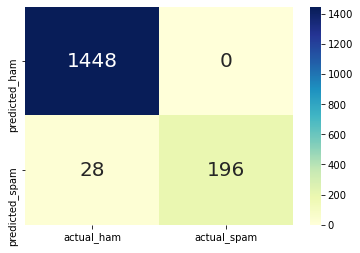

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cm = confusion_matrix(Y_test, Y_pred_cv)
sns.heatmap(cm, xticklabels=['actual_ham', 'actual_spam'], yticklabels=['predicted_ham', 'predicted_spam'], annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu")

tn, fp = cm[0]
fn, tp = cm[1]

accuracy = round((tp+tn)/(tp+tn+fp+fn), 3)
precision = round((tp)/(tp+fp), 3)
recall = round((tp)/(tp+fn), 3)
f1 = round((2*precision*recall)/(precision+recall), 3)

print('Accuracy: {}'.format(accuracy))
print('Precisision: {}'.format(precision))
print('Recall: {}'.format(recall))
print("F1 Score: {}".format(f1))